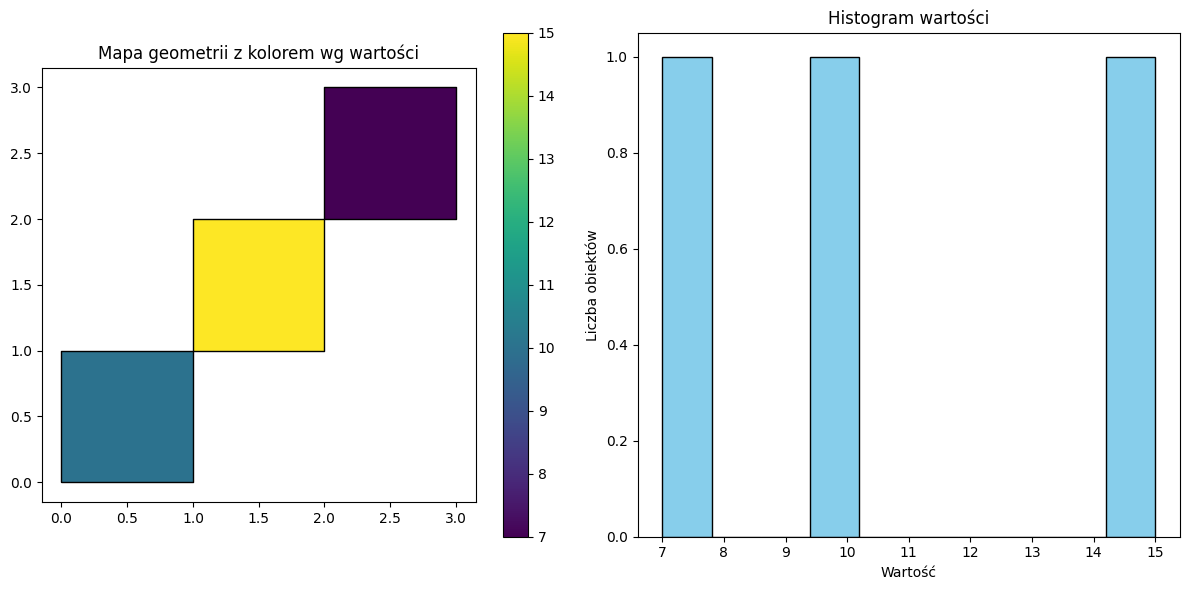

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# Przykładowe dane – możesz zamienić na swoje
data = {
    'geom': [
        'POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))',
        'POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))',
        'POLYGON ((2 2, 3 2, 3 3, 2 3, 2 2))',
    ],
    'value': [10, 15, 7]
}

# Krok 1: Stwórz DataFrame
df = pd.DataFrame(data)

# Krok 2: Konwersja WKT do geometrii
df['geometry'] = df['geom'].apply(wkt.loads)

# Krok 3: Tworzenie GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# Krok 4: Wykres – mapa i histogram obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Mapa z geometrią
gdf.plot(ax=ax1, column='value', legend=True, cmap='viridis', edgecolor='black')
ax1.set_title('Mapa geometrii z kolorem wg wartości')

# Histogram wartości
gdf['value'].plot.hist(ax=ax2, bins=10, color='skyblue', edgecolor='black')
ax2.set_title('Histogram wartości')
ax2.set_xlabel('Wartość')
ax2.set_ylabel('Liczba obiektów')

plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# Załaduj swój złożony GeoDataFrame
gdf = gpd.read_file("twoj_plik.geojson")  # lub .shp, .gpkg itd.

# Filtracja wg typu geometrii
punkty = gdf[gdf.geometry.geom_type == 'Point']
linie = gdf[gdf.geometry.geom_type == 'LineString']
poligony = gdf[gdf.geometry.geom_type == 'Polygon']

# (opcjonalnie) Multi-geometrie rozdziel na pojedyncze elementy
gdf = gdf.explode(index_parts=True).reset_index(drop=True)

# Można dodać MultiPoint, MultiLineString, MultiPolygon
multi_punkty = gdf[gdf.geometry.geom_type == 'MultiPoint']
multi_linie = gdf[gdf.geometry.geom_type == 'MultiLineString']
multi_poligony = gdf[gdf.geometry.geom_type == 'MultiPolygon']

# Po eksplozji ponownie zebrać jeśli chcesz tylko czyste geometrie
punkty = gdf[gdf.geometry.geom_type == 'Point']
linie = gdf[gdf.geometry.geom_type == 'LineString']
poligony = gdf[gdf.geometry.geom_type == 'Polygon']

# Zapisz do osobnych plików jeśli potrzebujesz
punkty.to_file("punkty.geojson", driver='GeoJSON')
linie.to_file("linie.geojson", driver='GeoJSON')
poligony.to_file("poligony.geojson", driver='GeoJSON')


In [ ]:
df['A'] = df['A'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Obliczenie score jako suma(wartosc * waga) dla każdej kolumny
df['score'] = sum(df[kol] * waga for kol, waga in wagi.items())

print(df)

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

# Lista kolumn do przekształcenia
columns_to_transform = ['col1', 'col2', 'col3']  # <-- Podmień na swoje

# Krok 1: Transformacja Yeo-Johnsona (zbliża rozkład do normalnego)
pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(gdf[columns_to_transform])

# Krok 2: Skalowanie do zakresu 0–100
scaler = MinMaxScaler(feature_range=(0, 100))
normalized = scaler.fit_transform(transformed)

# Krok 3: Zapisz wyniki do nowych kolumn
for i, col in enumerate(columns_to_transform):
    gdf[col + '_scaled'] = normalized[:, i]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Kolumny do przeskalowania
cols = ['col1', 'col2', 'col3']  # <-- podstaw swoje kolumny

# Krok 1: Log-transformacja (dodaj 1, by uniknąć log(0))
gdf_log = gdf[cols].apply(lambda x: np.log1p(x))

# Krok 2: Min-max scaling do 0–100
scaler = MinMaxScaler(feature_range=(0, 100))
gdf_scaled = scaler.fit_transform(gdf_log)

# Krok 3: Dodaj przeskalowane kolumny z sufiksem
for i, col in enumerate(cols):
    gdf[col + '_scaled'] = gdf_scaled[:, i]
